# Decorrelating your data and dimension reduction

## Visualizing the PCA transformation

### Correlated data in nature

You are given an array grains giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

In [1]:
import numpy as np
import pandas as pd

In [6]:
grains=pd.read_csv("Grains/seeds-width-vs-length.csv",header=None)
grains.head()

,0,1
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658


width and length of grain extracted from the seeds.csv dataset, same as column index number 4 and 3 respectively.

In [8]:
grains=np.array(grains)

**Instructions**

* Import:
    * matplotlib.pyplot as plt.
    * pearsonr from scipy.stats.
* Assign column 0 of grains to width and column 1 of grains to length.
* Make a scatter plot with width on the x-axis and length on the y-axis.
* Use the pearsonr() function to calculate the Pearson correlation of width and length.

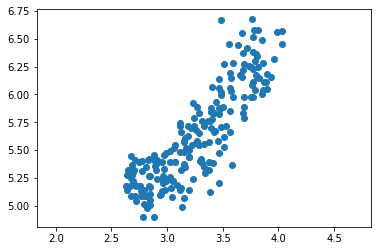

In [9]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

In [10]:
# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)

0.8604149377143469


As you would expect, the width and length of the grain samples are highly correlated

In [11]:
# Display the pvalue
print(pvalue)

8.121332906192771e-63


meaning that width is good enough to predict the seed length.

### Decorrelating the grain measurements with PCA

You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

**Instructions**

* Import PCA from sklearn.decomposition.
* Create an instance of PCA called model.
* Use the .fit_transform() method of model to apply the PCA transformation to grains. Assign the result to pca_features.
* The subsequent code to extract, plot, and compute the Pearson correlation of the first two columns pca_features has been written for you, so hit 'Submit Answer' to see the result!

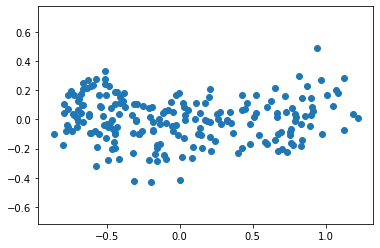

Correlation:  7.632783294297951e-17
Pvalue:  0.9999999999999515


In [12]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print("Correlation: ",correlation)

# Pvalue
print("Pvalue: ",pvalue)

You've successfully decorrelated the grain measurements with PCA!

### Principal components

![Principal components](Principal_Components.png)

The image on top contains three scatter plots of the same point cloud. Each scatter plot shows a different set of axes (in red). In which of the plots could the axes represent the principal components of the point cloud?

Recall that the principal components are the directions along which the the data varies.

the principal components have to align with the axes of the point cloud. This happens in both plot 1 and plot 3.

## Intrinsic dimension

intrinsic dimension = number of features needed to approximate the dataset.

PCA identifies intrinsic dimension.

intrinsic dimension = number of PCA features with significant variance. 


### The first principal component

The first principal component of the data is the direction in which the data varies the most. In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

The array grains gives the length and width of the grain samples. PyPlot (plt) and PCA have already been imported for you.

**Instructions**

* Make a scatter plot of the grain measurements. This has been done for you.
* Create a PCA instance called model.
* Fit the model to the grains data.
* Extract the coordinates of the mean of the data using the .mean_ attribute of model.
* Get the first principal component of model using the .components_[0,:] attribute.
* Plot the first principal component as an arrow on the scatter plot, using the plt.arrow() function. You have to specify the first two arguments - mean[0] and mean[1].

array([3.25860476, 5.62853333])

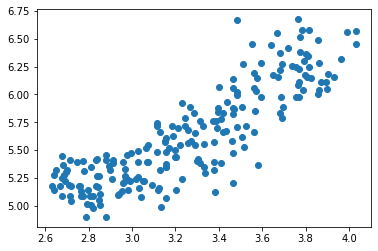

In [14]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_
mean

In [15]:
 model.components_

array([[ 0.63910027,  0.76912343],
       [-0.76912343,  0.63910027]])

In [16]:
# Get the first principal component: first_pc
first_pc = model.components_[0,:]
first_pc

array([0.63910027, 0.76912343])

Putting it together

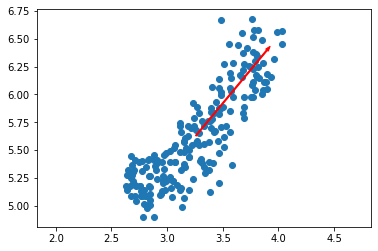

In [18]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

This is the direction in which the grain data varies the most.

### Variance of the PCA features

The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.

In [30]:
samples=pd.read_csv("fish.csv",header=None)
samples.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [31]:
samples.corr()

,1,2,3,4,5,6
1,1.000000,0.897468,0.903960,0.917462,0.289579,0.076129
2,0.897468,1.000000,0.999502,0.992451,0.083564,-0.042528
3,0.903960,0.999502,1.000000,0.995336,0.109940,-0.020755
4,0.917462,0.992451,0.995336,1.000000,0.200880,0.046017
5,0.289579,0.083564,0.109940,0.200880,1.000000,0.770865
6,0.076129,-0.042528,-0.020755,0.046017,0.770865,1.000000


In [32]:
samples.var()

1    145110.683403
2       127.451689
3       148.475328
4       174.168524
5       107.154440
6         4.483703
dtype: float64

In [33]:
samples= samples.drop(0,axis=1).values.reshape(-1,6)
samples[0:5]

array([[242. ,  23.2,  25.4,  30. ,  38.4,  13.4],
       [290. ,  24. ,  26.3,  31.2,  40. ,  13.8],
       [340. ,  23.9,  26.5,  31.1,  39.8,  15.1],
       [363. ,  26.3,  29. ,  33.5,  38. ,  13.3],
       [430. ,  26.5,  29. ,  34. ,  36.6,  15.1]])

In [29]:
samples.shape

(85, 6)

**Instructions**

* Create an instance of StandardScaler called scaler.
* Create a PCA instance called pca.
* Use the make_pipeline() function to create a pipeline chaining scaler and pca.
* Use the .fit() method of pipeline to fit it to the fish samples samples.
* Extract the number of components used using the .n_components_ attribute of pca. Place this inside a range() function and store the result as features.
* Use the plt.bar() function to plot the explained variances, with features on the x-axis and pca.explained_variance_ on the y-axis.


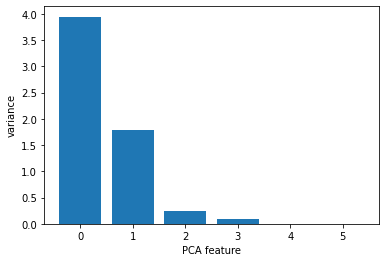

In [22]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


It looks like PCA features 0 and 1 have significant variance.

### Intrinsic dimension of the fish data

In the previous exercise, you plotted the variance of the PCA features of the fish measurements. Looking again at your plot, what do you think would be a reasonable choice for the "intrinsic dimension" of the fish measurements? Recall that the intrinsic dimension is the number of PCA features with significant variance.

Since PCA features 0 and 1 have significant variance, the intrinsic dimension of this dataset appears to be 2.

In [36]:
pca.explained_variance_

array([3.94616746e+00, 1.78097907e+00, 2.43235593e-01, 1.00351845e-01,
       5.63140996e-04, 1.31462706e-04])

## Dimension reduction with PCA

* PCA features are in decreasing order of variance
* Assumes the low variance features are noise
* High variance features are informative
* n_components=2 means keep first 2.

Like all assumptions, there are cases where this doesn't hold. 

**Word frequency array**

* Rows represent documents, columns represent words
* Entries measure presence of each word in each document.
* Sparse array. most entries are zero.
* Can use scipy.sparse.csr_matrix intead of Numpy array.
* csr_matrix remembers only non-zero entries (saves space!)
* you can use TruncatedSVD in scikit-learn.

### Dimension reduction of the fish measurements

In a previous exercise, you saw that 2 was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

The fish measurements have already been scaled for you, and are available as scaled_samples.

In [38]:
samples[0:5]

array([[242. ,  23.2,  25.4,  30. ,  38.4,  13.4],
       [290. ,  24. ,  26.3,  31.2,  40. ,  13.8],
       [340. ,  23.9,  26.5,  31.1,  39.8,  15.1],
       [363. ,  26.3,  29. ,  33.5,  38. ,  13.3],
       [430. ,  26.5,  29. ,  34. ,  36.6,  15.1]])

In [44]:
pd.DataFrame(samples).describe()

,0,1,2,3,4,5
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,431.758824,27.338824,29.557647,33.120000,28.076471,12.865882
std,380.933962,11.289450,12.185045,13.197292,10.351543,2.117476
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.400000,21.000000,23.700000,16.900000,11.000000
50%,390.000000,28.400000,30.700000,35.000000,27.100000,13.700000
75%,650.000000,32.700000,36.000000,40.600000,39.200000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [50]:
samples.mean()

93.7862745098039

As seen above, the datasets are scaled differently

In [45]:
from sklearn.preprocessing import scale

In [48]:
scaled_samples=scale(samples)

pd.DataFrame(scaled_samples).describe()

,0,1,2,3,4,5
count,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01
mean,3.134747e-17,-3.657205e-17,-1.201653e-16,7.732377e-16,-1.018793e-16,2.899641e-16
std,1.005935e+00,1.005935e+00,1.005935e+00,1.005935e+00,1.005935e+00,1.005935e+00
min,-1.140148e+00,-1.607331e+00,-1.631090e+00,-1.701293e+00,-1.319324e+00,-1.979057e+00
25%,-8.232635e-01,-7.073806e-01,-7.064754e-01,-7.180189e-01,-1.086099e+00,-8.864121e-01
50%,-1.102728e-01,9.455503e-02,9.430679e-02,1.432989e-01,-9.489075e-02,3.962586e-01
75%,5.763109e-01,4.777021e-01,5.318476e-01,5.701467e-01,1.080954e+00,8.713218e-01
max,3.217017e+00,2.821136e+00,2.793851e+00,2.658652e+00,1.595994e+00,1.536410e+00


In [49]:
scaled_samples.mean()

1.2190684191962504e-16

**Instructions**

* Create a PCA instance called pca with n_components=2.
* Use the .fit() method of pca to fit it to the scaled fish measurements scaled_samples.
* Use the .transform() method of pca to transform the scaled_samples. Assign the result to pca_features.

In [51]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

PCA(n_components=2)

In [52]:
# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


In [54]:
pca_features[0:5]

array([[-0.57640502, -0.94649159],
       [-0.36852393, -1.17103598],
       [-0.28028168, -1.59709224],
       [-0.00955427, -0.81967711],
       [ 0.1238945 , -1.33121167]])

You've successfully reduced the dimensionality from 6 to 2.

### A tf-idf word-frequency array

In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.

You are given a list documents of toy documents about pets. Its contents have been printed in the IPython Shell.

In [55]:
documents= ['cats say meow', 'dogs say woof', 'dogs chase cats']
documents

['cats say meow', 'dogs say woof', 'dogs chase cats']

**Instructions**

* Import TfidfVectorizer from sklearn.feature_extraction.text.
* Create a TfidfVectorizer instance called tfidf.
* Apply .fit_transform() method of tfidf to documents and assign the result to csr_mat. This is a word-frequency array in csr_matrix format.
* Inspect csr_mat by calling its .toarray() method and printing the result. This has been done for you.
* The columns of the array correspond to words. Get the list of words by calling the .get_feature_names() method of tfidf, and assign the result to words.


In [56]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


You'll now move to clustering Wikipedia articles!

### Clustering Wikipedia part I

You saw in the video that TruncatedSVD is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays. Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia articles.

Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. (This time, we've precomputed the word-frequency matrix for you, so there's no need for a TfidfVectorizer).

**Instructions**

* Import:
    * TruncatedSVD from sklearn.decomposition.
    * KMeans from sklearn.cluster.
    * make_pipeline from sklearn.pipeline.
* Create a TruncatedSVD instance called svd with n_components=50.
* Create a KMeans instance called kmeans with n_clusters=6.
* Create a pipeline called pipeline consisting of svd and kmeans.



In [57]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

Now that you have set up your pipeline, you will use it to cluster the articles.

### Clustering Wikipedia part II

It is now time to put your pipeline from the previous exercise to work! You are given an array articles of tf-idf word-frequencies of some popular Wikipedia articles, and a list titles of their titles. Use your pipeline to cluster the Wikipedia articles.

A solution to the previous exercise has been pre-loaded for you, so a Pipeline pipeline chaining TruncatedSVD with KMeans is available.

In [60]:
articles=pd.read_csv("Wikipedia articles/wikipedia-vectors.csv")
articles.head()

,Unnamed: 0,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
1,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
2,2,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
4,4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [63]:
articles.shape

(13125, 60)

In [62]:
articles=articles.drop("Unnamed: 0", axis=1)
articles.head()

,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
2,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [67]:
titles=list(articles.columns)

In [68]:
articles=articles.values
articles.shape

(13125, 60)

In [70]:
articles=articles.transpose()
articles.shape

(60, 13125)

In [71]:
articles[0:2]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02960744, ..., 0.        , 0.        ,
        0.        ]])

In [72]:
from scipy.sparse import csr_matrix

In [76]:
csr_matrix(articles).toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02960744, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01159441, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00610985, 0.        , ..., 0.        , 0.00547551,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

**Instructions**

* Import pandas as pd.
* Fit the pipeline to the word-frequency array articles.
* Predict the cluster labels.
* Align the cluster labels with the list titles of article titles by creating a DataFrame df with labels and titles as columns. This has been done for you.
* Use the .sort_values() method of df to sort the DataFrame by the 'label' column, and print the result.
* Hit 'Submit Answer' and take a moment to investigate your amazing clustering of Wikipedia pages!

In [77]:
# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

    label                                        article
34      0                             Zlatan Ibrahimović
31      0                              Cristiano Ronaldo
35      0                Colombia national football team
36      0              2014 FIFA World Cup qualification
37      0                                       Football
38      0                                         Neymar
39      0                                  Franck Ribéry
33      0                                 Radamel Falcao
30      0                  France national football team
32      0                                   Arsenal F.C.
21      1                             Michael Fassbender
22      1                              Denzel Washington
23      1                           Catherine Zeta-Jones
24      1                                   Jessica Biel
25      1                                  Russell Crowe
26      1                                     Mila Kunis
20      1                      

In [81]:
df.shape
df.sort_values('label').head(15)

,label,article
34,0,Zlatan Ibrahimović
31,0,Cristiano Ronaldo
35,0,Colombia national football team
36,0,2014 FIFA World Cup qualification
37,0,Football
38,0,Neymar
39,0,Franck Ribéry
33,0,Radamel Falcao
30,0,France national football team
32,0,Arsenal F.C.


Take a look at the cluster labels and see if you can identify any patterns!

In [120]:
df.sort_values('label').head(60)

,label,article
34,0,Zlatan Ibrahimović
31,0,Cristiano Ronaldo
35,0,Colombia national football team
36,0,2014 FIFA World Cup qualification
37,0,Football
38,0,Neymar
39,0,Franck Ribéry
33,0,Radamel Falcao
30,0,France national football team
32,0,Arsenal F.C.
